In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats.mstats import zscore
from scipy.stats import ttest_ind
import csv
%matplotlib inline

sns.set_context('paper')
plt.tight_layout()

## Import and normalize ssGSEA data

In [2]:
df = pd.read_csv('SCLC.tsv', sep='\t')
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(zscore)

## Separate into Relapse and Treatment Naïve groups

In [3]:
relapse_bool = (df.Name.str.contains('relapse') | df.Name.str.contains('RG'))
relapse = df[relapse_bool]
tn = df[~relapse_bool]
df.loc[relapse.index, 'tumor_type'] = 'Relapsed'
df.loc[tn.index, 'tumor_type'] = 'Treatment-Naïve'

## Test for differences

In [4]:
# APC loss driven WNT activation signature
ttest_ind(relapse.LIN_APC_TARGETS, tn.LIN_APC_TARGETS)

Ttest_indResult(statistic=-15.75941905402032, pvalue=1.696726668740939e-28)

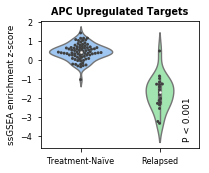

In [9]:
sns.set_palette('pastel')

dims = (3, 2.5)
fig, ax = plt.subplots(figsize=dims)

ax1 = sns.swarmplot(x='tumor_type', y='LIN_APC_TARGETS', data=df, order=['Treatment-Naïve', 'Relapsed'], 
                  color="0.25", size=3, ax=ax)
ax1 = sns.violinplot(x='tumor_type', y='LIN_APC_TARGETS', data=df, order=['Treatment-Naïve', 'Relapsed'], ax=ax)

ax1.set(xlabel='', ylabel='ssGSEA enrichment z-score')
ax1.set_title(label="APC Upregulated Targets", weight='bold')
ax1.text(1.3, -2.3, 'P < 0.001', fontsize=9, rotation="vertical")
plt.tight_layout()
ax1.figure.savefig('APC.pdf')

In [6]:
# Beta-catenin oncogenic signature
ttest_ind(relapse.BILD_CTNNB1_ONCOGENIC_SIGNATURE, tn.BILD_CTNNB1_ONCOGENIC_SIGNATURE).pvalue

6.0392797394618806e-11

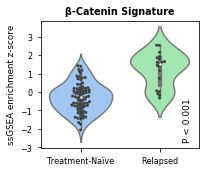

In [7]:
fig, ax = plt.subplots(figsize=dims)

ax1 = sns.swarmplot(x='tumor_type', y='BILD_CTNNB1_ONCOGENIC_SIGNATURE', data=df, order=['Treatment-Naïve', 'Relapsed'], 
                  color="0.25", size=3, ax=ax)
ax1 = sns.violinplot(x='tumor_type', y='BILD_CTNNB1_ONCOGENIC_SIGNATURE', data=df, 
                   order=['Treatment-Naïve', 'Relapsed'], ax=ax)

ax1.set(xlabel='', ylabel='ssGSEA enrichment z-score')
ax1.set_title(label="β-Catenin Signature", weight='bold')
ax1.text(1.3, -0.7, 'P < 0.001', fontsize=9, rotation="vertical")
plt.tight_layout()
ax1.figure.savefig('CTNNB1.pdf')

In [10]:
# ASCL driven gene expression signature
ttest_ind(relapse.BORROMEO_ASCL1_SIGNATURE, tn.BORROMEO_ASCL1_SIGNATURE)

Ttest_indResult(statistic=-2.6363541994174291, pvalue=0.009759182276979016)

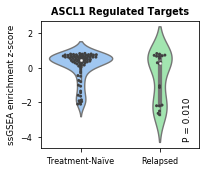

In [17]:
fig, ax = plt.subplots(figsize=dims)

ax1 = sns.swarmplot(x='tumor_type', y='BORROMEO_ASCL1_SIGNATURE', data=df, order=['Treatment-Naïve', 'Relapsed'], 
                  color="0.25", size=3, ax=ax)
ax1 = sns.violinplot(x='tumor_type', y='BORROMEO_ASCL1_SIGNATURE', data=df, 
                   order=['Treatment-Naïve', 'Relapsed'], ax=ax)

ax1.set(xlabel='', ylabel='ssGSEA enrichment z-score')
ax1.set_title(label="ASCL1 Regulated Targets", weight='bold')
ax1.text(1.3, -2.1, 'P = 0.010', fontsize=9, rotation="vertical")
plt.tight_layout()
ax1.figure.savefig('ASCL1.pdf')

## Load expression values

In [5]:
import pandas as pd

In [6]:
combined_expression = pd.read_csv('combined_expression.csv')

In [17]:
combined_expression.set_index('NAME', inplace=True)

In [31]:
percentiles = combined_expression.rank(1, pct=True)

In [41]:
def get_sample_type(sample_id):
    if 'RG' in sample_id or 'relapse' in sample_id:
        return 'relapse'
    else:
        return 'primary'


In [50]:
slfn11 = percentiles.loc['SLFN11']

In [63]:
grouped_slfn11 = slfn11.groupby(get_sample_type)

In [64]:
grouped_slfn11.groups

{'primary': Index(['A-TNG-S00022', 'A-TNG-S00035', 'A-TNG-S00050', 'A-TNG-S00213',
        'A-TNG-S00356', 'A-TNG-S00472', 'A-TNG-S00501', 'A-TNG-S00825',
        'A-TNG-S00827', 'A-TNG-S00829', 'A-TNG-S00830', 'A-TNG-S00831',
        'A-TNG-S00832', 'A-TNG-S00836', 'D-TNG-S00837', 'A-TNG-S00838',
        'A-TNG-S01242', 'A-TNG-S01248', 'A-TNG-S01297', 'A-TNG-S01366',
        'A-TNG-S01453', 'N-TNG-S01494', 'A-TNG-S01512', 'A-TNG-S01524',
        'D-TNG-S01542', 'N-TNG-S01556', 'A-TNG-S01563', 'A-TNG-S01578',
        'A-TNG-S01698', 'A-TNG-S01728', 'A-TNG-S01792', 'A-TNG-S01861',
        'A-TNG-S01864', 'A-TNG-S01873', 'A-TNG-S02065', 'A-TNG-S02093',
        'A-TNG-S02120', 'N-TNG-S02139', 'A-TNG-S02163', 'A-TNG-S02194',
        'D-TNG-S02209', 'A-TNG-S02234', 'A-TNG-S02241', 'A-TNG-S02242',
        'A-TNG-S02243', 'A-TNG-S02244', 'D-TNG-S02246', 'A-TNG-S02248',
        'A-TNG-S02249', 'N-TNG-S02255', 'N-TNG-S02256', 'A-TNG-S02284',
        'A-TNG-S02285', 'D-TNG-S02286', 'A-TNG-S02287

In [65]:
grouped_slfn11.describe()

,count,mean,std,min,25%,50%,75%,max
primary,80.0,0.507323,0.283558,0.020202,0.280303,0.510101,0.750000,0.989899
relapse,19.0,0.495481,0.324466,0.010101,0.217172,0.404040,0.767677,1.000000


In [93]:
type(grouped_slfn11)

pandas.core.groupby.SeriesGroupBy

In [97]:
slfn11_df = slfn11.to_frame()
slfn11_df['type'] = slfn11_df.index.map(get_sample_type)

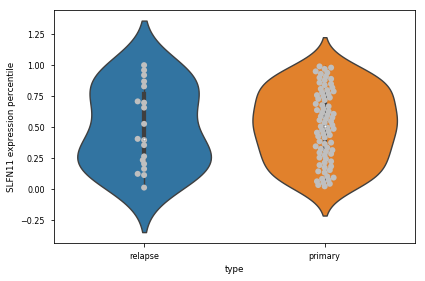

In [121]:
ax1 = sns.swarmplot(x='type', y='SLFN11', data=slfn11_df, color="0.75", size=6,)
ax1 = sns.violinplot(x='type', y='SLFN11', data=slfn11_df)
ax1.set(ylabel='SLFN11 expression percentile')
plt.tight_layout()
ax1.figure.savefig('response.pdf')

In [103]:
grouped_slfn11.get_group('primary').count()

80